<a href="https://colab.research.google.com/github/AjinkyaRaghuwanshi/IMLAssignments/blob/master/SHALAAssignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SVM**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]

for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)





---


**Visualizing the above data**


---



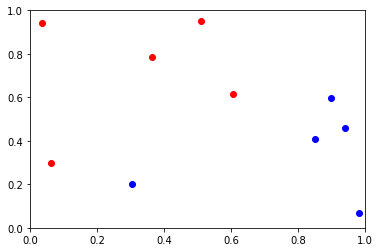

In [214]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
def svm_function(x, y, epoch, l_rate):

    w = np.zeros(3)
    x =  np.c_[np.ones(len(x)),x]

    for i in range(0,epoch):
      n=1/(l_rate*(i+1));
      j = np.random.randint(len(x))

      
      exp = y[j]*(np.dot(w,x[j]))
      # print(exp)

      
      if (exp < 1):
        w = (1-n*l_rate)*w+n*((y[j]*x[j]))
      else:
        w = (1-n*l_rate)*w
      

    print(w)
    return w



---


**Run SVM Classifier**


---



In [216]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 150000, 0.001)

[-1.00666667 -6.24507465  9.42206658]


# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



In [217]:
print(w.shape)
# print(temp1.shape)
print(w[0])
print(X[1][1])
X.shape

(3,)
-1.006666666666662
0.2014160655199686


(10, 2)

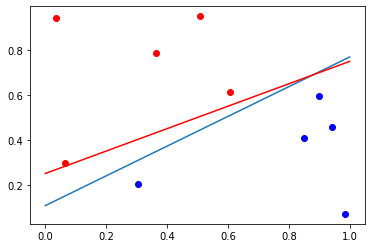

In [218]:
###################################
###### write your code here########
###################################
x= np.linspace(0,1,100)

#print(0.5*x- y + 0.5)

plt.plot(x,(-1*(((w[1]/w[2])*x)+(w[0]/w[2]))))
plt.plot(x,0.5*x + 0.25,'r')
# plt.plot(x,(-1*(((w[1]/w[2])*x)+((w[0]-1)/w[2]))),'b')
# plt.plot(x,(-1*(((w[1]/w[2])*x)+((w[0]+1)/w[2]))),'y')
# op=()
# for n in range(0,10):
#      op.append((w[1]*X[n][0])+(w[2]*X[n][1])+w[0])
#      plt.scatter(X[n][0]/X[n][1],op)

#plt.plot(x,np.dot(w))
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)

#**Linearly Non-separable Data**

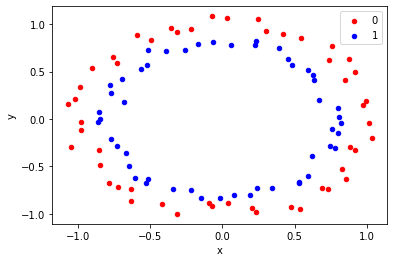

In [219]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.05)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()


In [220]:
# print(X)
print(df)
# print(group)

           x         y  label
0  -0.166433  0.787362      1
1   0.919645  0.500606      0
2   0.473163 -0.930399      0
3  -0.519592  0.574472      1
4   0.810644  0.025876      1
..       ...       ...    ...
95  0.743013 -0.283150      1
96  0.875927  0.636711      0
97 -1.071543  0.160701      0
98  0.078803 -0.796851      1
99 -0.722938 -0.717231      0

[100 rows x 3 columns]




---


**Train a SVM classifier on the linearly non-separable data by appropriate features crafted from input data For linearly non-separable data, you need to transform the data in a space where it can be linearly seprable.
These features can be exponential, polynomial, trignometric or any other function of actual input features.
For example, if your input data is (x1, x2) you can have hand-crafted features as (sin(x1), cos(x1), cos(x2), x1-x2).
Here you need to think of which hand-crafted features can be best suited for data given to you.
Write a function to convert input features to hand-crafted features. Use these features to train a SVM using svm_function.
Note that, if you choose to have L hand-crafted features, SVM will return L+1 dimensional 'w'.**


---



In [221]:
#####################################
######## write your code here########
#####################################
X1= df.x
# X1=X1**2
# X1 = np.sin(X1)
# X1= X1[:,0]
print(X1.shape)

X2 = df.y
# X2=X2**2
# X2 = np.sin(X2)
print(X2.shape)

Y1= df.label
print(Y1.shape)

X3= np.column_stack((X1,X2))
print(X3.shape)
csv1datanl= np.column_stack((X3,Y1))


# print(csv1datanl)
# print(X1)
# print(X3)
def Gaussian_kernel3d(x, mean1, mean2, mean3,  var1, var2, var3 ):
  num_fetures=3
  size = (len(x) , num_fetures)
  F = np.zeros(size)
  for i in range(0,len(x)):
    F[i,0] = np.exp(-(((x[i,0]-mean1[0])**2) + ((x[i,1]-mean1[1])**2))/(var1))
    F[i,1] = np.exp(-(((x[i,0]-mean2[0])**2) + ((x[i,1]-mean2[1])**2))/(var2))
    F[i,1] = np.exp(-(((x[i,0]-mean3[0])**2) + ((x[i,1]-mean3[1])**2))/(var3))
           
  return F
    ######################################################
    ### Write your code here for classification###########
    ######################################################
F = Gaussian_kernel3d(X, np.array([0.0,0.0]), np.array([0.0,0.0]),np.array([0.75,0.75]), 0.7, 1.0, 0.5 )
# w1 = svm_function(X3, Y1, 10000, 9)
print(F.shape)
def svm_function(x, y, epoch, l_rate):

    w = np.zeros(4)
    x =  np.c_[np.ones(len(x)),x]

    for i in range(0,epoch):
      n=1/(l_rate*(i+1));
      j = np.random.randint(len(x))

      
      exp = y[j]*(np.dot(w,x[j]))
      # print(exp)

      
      if (exp < 1):
        w = (1-n*l_rate)*w+n*((y[j]*x[j]))
      else:
        w = (1-n*l_rate)*w
      

    print(w)
    return w
w1 = svm_function(F, Y1, 10000,0.01)




(100,)
(100,)
(100,)
(100, 2)
(100, 3)
[0.9       0.3036505 0.0199141 0.       ]




---


**Visualize the data points in the new feature space "if possible" to see whether they got separated or not.**


---



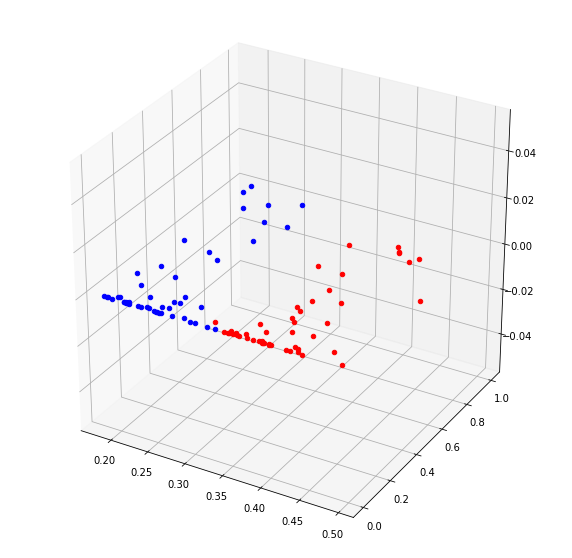

In [222]:
#####################################
####### write your code here ########
#####################################
Y1 = np.array(Y1)
figu = plt.figure(figsize=(10,10)).add_subplot(111, projection='3d')
Y1 = Y1.reshape((len(F),1))
F=np.append(F,Y1,axis=1)
#Visualizing the data
for x, y,z, l in F:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  figu.scatter(x, y,z, c=clr)